mchehab@kernel.org
mravindran04@gmail.com
Valentin.Rothberg@lip6.fr
sgayda2@uiuc.edu
tsg321@gmail.com
mchehab@kernel.org
robert.shade@gmail.com
ext-yuri.kululin@nokia.com
john@Calva.COM
wrlk@riede.org


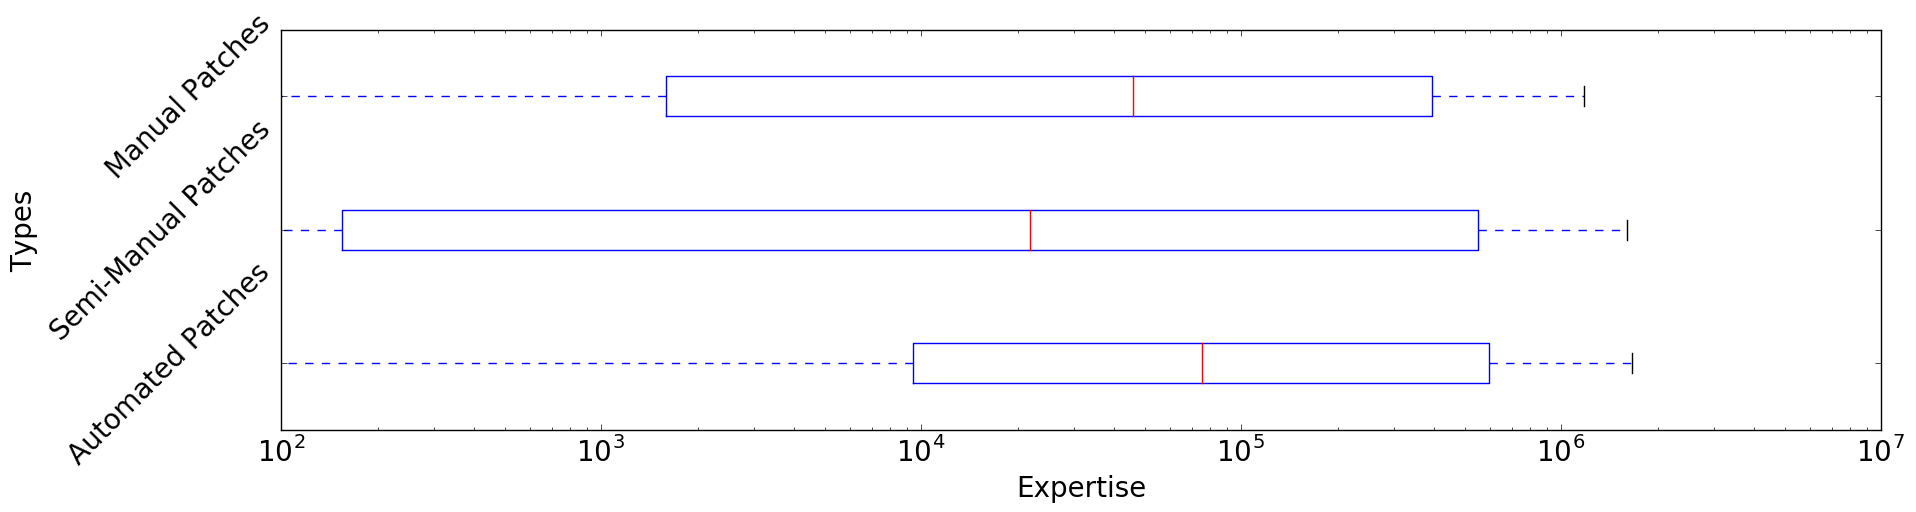

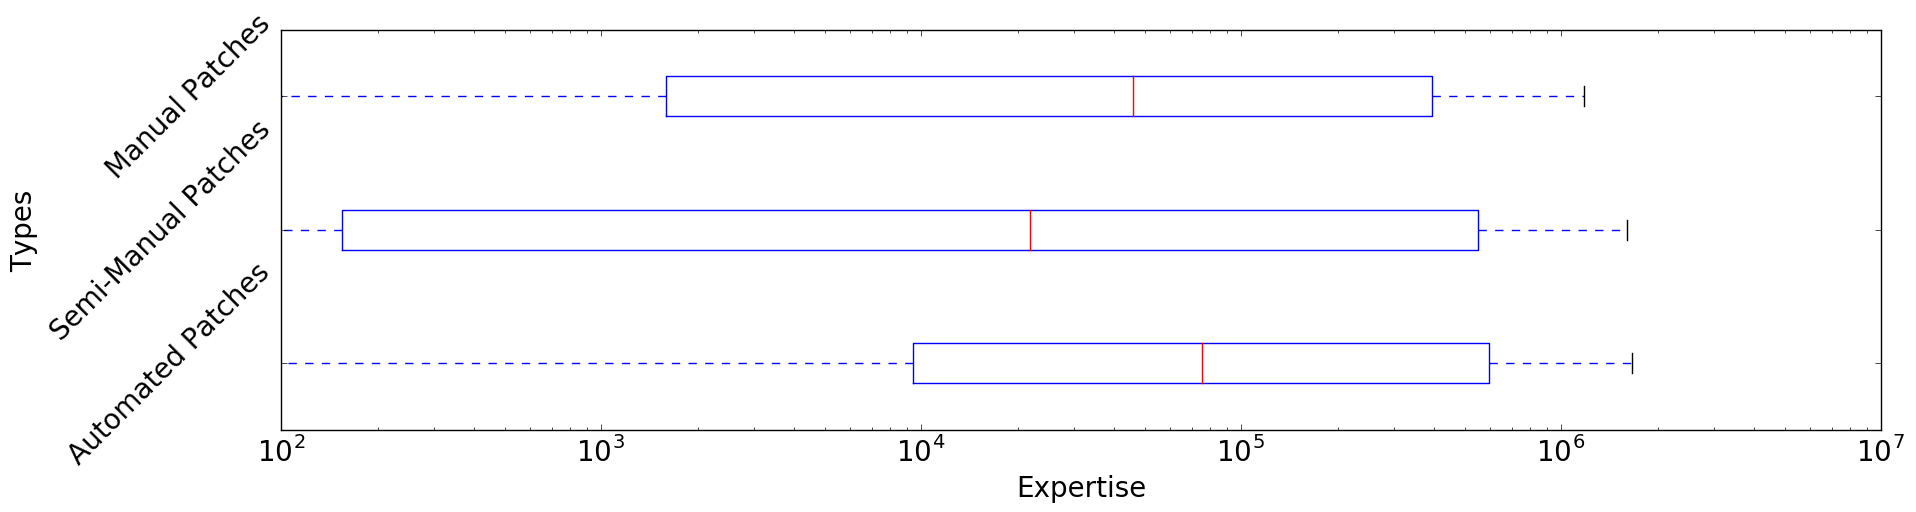

In [2]:
def plotExpertise(y1, y2,y3, outlier = True):

    y = [y1,y2,y3]
    fig = plt.figure()
    #ax1 = plt.subplot2grid((1,1),(0,0))
    ax1 = fig.add_subplot(111)
    
    #ax1.plot(x1,y1,'b-', color='b',label=typ)
    if outlier == True:
        ax1.boxplot(y, 0, 'rs', 0, 2)
    else:
        ax1.boxplot(y, 0, '', 0, 2)

    
    #ax1.grid(True)#, color='g' , linestyle ='-')
    varLabels = ['Automated Patches', 'Semi-Manual Patches', 'Manual Patches']
    
    ax1.set_yticklabels(varLabels, rotation=45)
    #if outlier == True:
    #    ax1.set_xticklabels(np.arange(-200,700,5), rotation='vertical')
    
    #    ax1.set_xticks(np.arange(-200,700,5))
    
    plt.xlabel('Expertise',fontsize=20)
    plt.ylabel('Types',fontsize=20)
    #plt.title("Speciality of all developers",fontsize=20)
    plt.tick_params(labelsize=20)
    ax1.set_xscale('log')
    #plt.subplots_adjust(left=0.09,bottom=0.16,right=1.95, top=0.95 , wspace= 0.2, hspace=0)
    plt.subplots_adjust(left=0.18,bottom=0.15,right=0.98, top=0.95 , wspace= 0.1, hspace=0)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    plt.ion()
    fig = plt.gcf()
    fig.set_size_inches(20,5, forward=True)
    
    #os.chdir(HOME)
    
    if outlier == True:
        plt.savefig("plots/ExpertiseOfAllDevelopers.pdf",dpi=100)
    else:
        plt.savefig("plots/ExpertiseOfAllDevelopersWithOutliers.pdf",dpi=100)
    

#HOME='/home/anil-mint-desktop/patchstudy/test/datasets/ds'
fileType1= 'dataset/t1.json'
fileType2= 'dataset/t2.json'
fileType3= 'dataset/t3.json'
import os
import ijson
import pandas as pd
#import numpy as np
#import os, sys, stat, time
import matplotlib.pyplot as plt
def loadList(aFile):
    with open(aFile, "rb") as fp:
        authorExDict = dict()
        for line in fp:
            l = line.split('count:')
            #print(l[0],l[1])
            author = l[0].strip()
            author=author.decode('utf-8')
            exp = l[1].split('diff:')
            calExp = int(exp[0]) * int(exp[1])
            if(calExp<0):
                continue
                #calExp=0
            authorExDict[author] = calExp
    return authorExDict

def prepareYaxis(ds, d):
    commits = pd.DataFrame.from_dict(ds)
    
    uniqueAuthorsT1 = commits.email.unique()
    y1 = list()
    
    for a in uniqueAuthorsT1:
        #print a
        if a!='':
            try:
                percen = d[a]
                exp = percen
                y1.append(exp)
            except:
                print a
           
                #exp = percen
        #y1.append(exp)
    return y1

def datasetReader(filename):
    with open(filename, 'r') as f:
        objects = ijson.items(f, 'item')
        rows = list(objects)
    return rows

    
if __name__ == '__main__':

    #os.chdir(HOME)
    d= loadList('dataset/developExpertise3')
    dsT1 = datasetReader(fileType1)
   
    dsT2 = datasetReader(fileType2)
  
    dsT3 = datasetReader(fileType3)
    
    y1= prepareYaxis(dsT1,d)
    y2= prepareYaxis(dsT2,d)
    y3= prepareYaxis(dsT3,d)
    
    #print y1
    #print y2
    #print y3
    
    plotExpertise(y1,y2,y3, False)
    
            

In [22]:
saveList('issta_commitment', y)

In [23]:
c1 = pd.DataFrame(y1,columns=['commitment'])
c1['type'] = 'H'
c2 = pd.DataFrame(y2,columns=['commitment'])
c2['type'] = 'DLH'
c3 = pd.DataFrame(y3,columns=['commitment'])
c3['type'] = 'HMG'


frames = [c1, c2, c3]

result = pd.concat(frames)

result.to_csv('issta_commitment.csv')